In [2]:
#시계열 분석
#영국왕들의 수명 데이터

import pandas as pd

df = pd.read_csv('c:/data/time/kings.dat',header=None,names=['age'])

df.head()

,age
0,60
1,43
2,67
3,50
4,56


<Axes: >

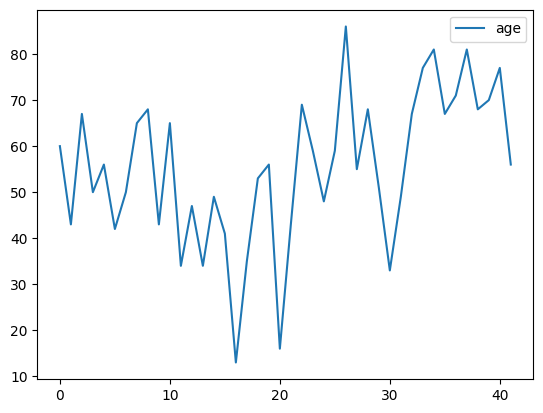

In [3]:
df.plot()

In [ ]:
#안정적인 시계열 : 시간의 추이와 관계없이 평균,분산이 일정한 경우

#불안정적인 시계열 : 차분을 통해 시계열을 안정적으로 변환한 후 분석 진행

#1025 1030 1015 1030

# 1030-1025=5

# 1015-1030=-15

# 데이터.diff(periods=n) n 차분

# 정상성을 만족시키기 위해 차분을 사용함

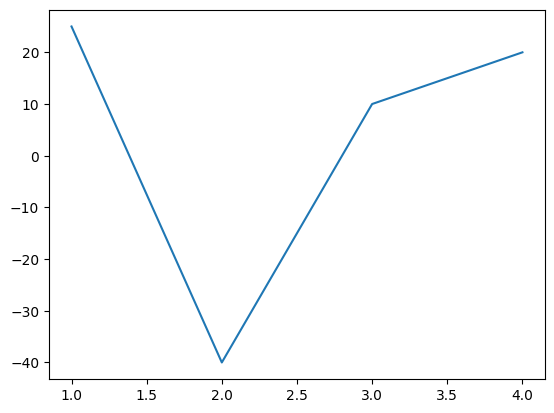

In [4]:
import matplotlib.pyplot as plt

a=pd.Series([1025,1050,1010,1020,1040])

b=a.diff(periods=1).iloc[1:]

plt.plot(b)

In [ ]:
#정상성(stationary) : 모든 시점에 평균이 일정한 특성

#  시간에 따라 확률적인 성분이 변하지 않는다는 가정, 정상성이 없으면 비시계열 자료로 분류됨
#차분(difference) : 현시점 자료에서 전시점 자료를 빼는 것

#평균이 일정하지 않은 시계열은 차분(difference)을 통해 정상화

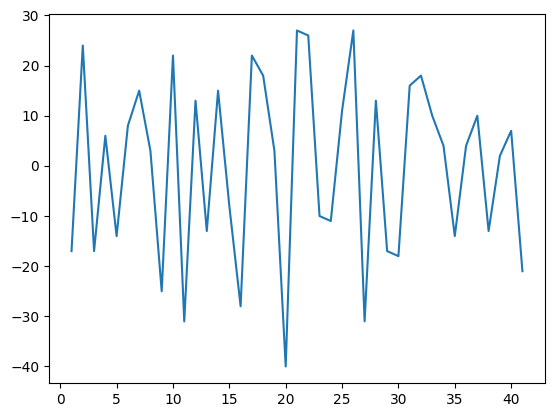

In [5]:
#1차 차분을 통해 데이터를 정상화하는 과정

diff1=df['age'].diff(periods=1).iloc[1:]

diff1.plot()

plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인

diff1=np.log(df['age']).diff(periods=1).iloc[1:]

result = adfuller(diff1)

print(result)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

(-7.446856429613952, 5.807660899733621e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.204960096784966)
ADF Statistic: -7.446856
p-value: 0.000000


In [ ]:
#가장 적절한 arima 모델을 추천해주는 함수

# arima: AR모형과 MA모형을 결합한 함수

# arima(p,d,q)

# ar(p) 모형의 p,  

#   자기상관모형(Autocorrelation) : 이전의 값이 이후의 값에 영향을 미치는 모형

#   ar(1) : 직전 데이터가 다음 데이터에 영향을 줄 경우

#   ex) 용수철을 잡아 당기면 원래 길이로 돌아가려는 경향

# ma(q) 모형의 q

#   이동평균(Moving Average) : 시간이 지날수록 평균값이 지속적으로 증가하거나 감소하는 경향

#   ma(1) 직전 데이터가 다음 데이터에 영향을 주는 경우

# d : 차분차수

In [8]:
#pip install pmdarima

from pmdarima.arima import auto_arima

model = auto_arima(df)

model

#가장 적절한 모형은 arima(0,1,1)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
#학습용,검증용 구분

train = df[:30]

test = df[30:]

print(len(df['age']))

print(df['age'].values)

print(df['age'].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


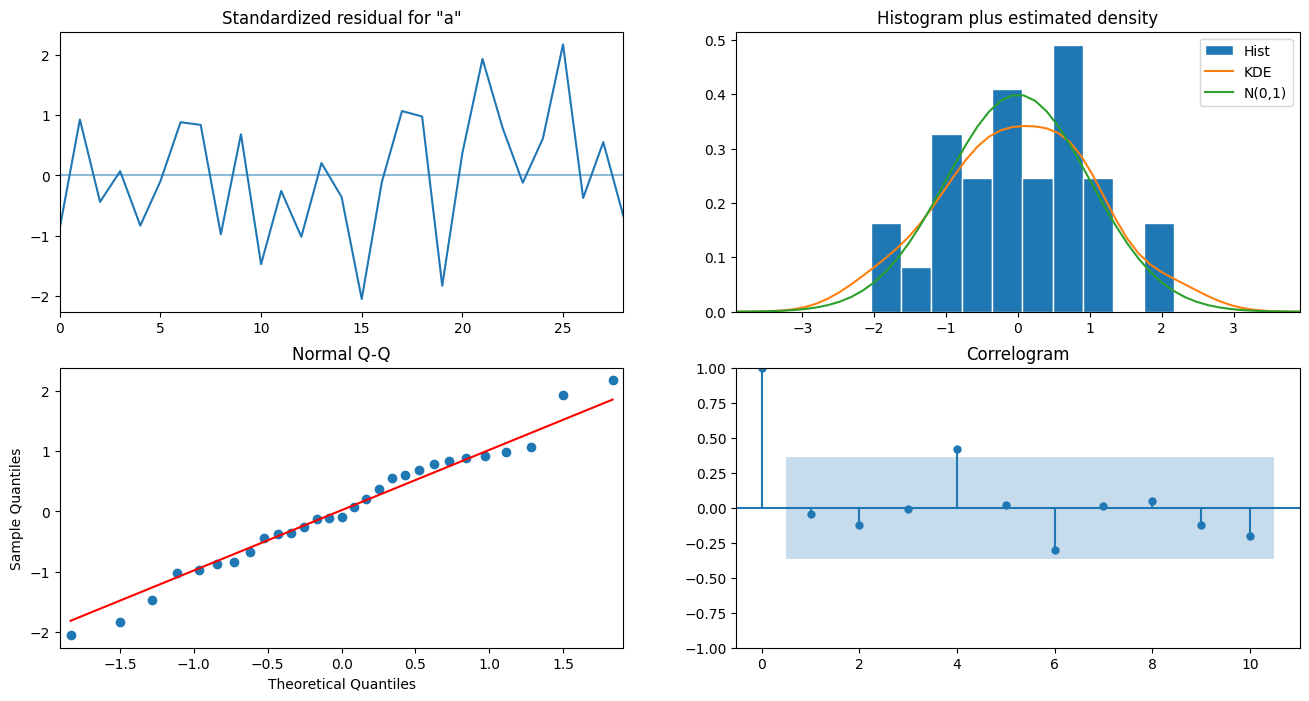

In [10]:
#arima(1,2,1)을 수행할 경우  order=c(1,2,1)로 모형을 생성함

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(0,1,1)).fit()

model.plot_diagnostics(figsize=(16, 8))

plt.show()

#Standardized residual: 잔차를 시계열로 그린 그래프

#Histogram plus estimated density와 Normal Q-Q : 잔차가 정규성을 만족하는가

#Normal Q-Q plot 데이터의 정규성 가정에 대한 검토, 모집단이 정규성을 따른다면 직선의 형태로 그려짐

#안정적인 시계열 자료이고 정규분포임

In [11]:
# dynamic=False , in-sample prediction(샘플 내 예측), 학습 데이터만 사용하여 예측

# dynamic=True , out-sample prediction(샘플 외 예측), 학습 데이터 외에 동적으로 데이터를 생성하여 예측(최종 데이터를 기준으로 생성된 동적 데이터를 활용하여 향후 추세 예측), 시차가 멀어질수록 실제값과 다를 수 있음

predictions = model.predict(start=1, end=len(test), dynamic=False)

predictions.index=len(train)+(predictions.index-1)

predictions

30    59.989111
31    51.115646
32    57.169734
33    54.861844
34    55.195907
35    51.513504
36    51.102642
37    54.818956
38    58.314968
39    54.271040
40    57.097169
41    51.021130
Name: predicted_mean, dtype: float64

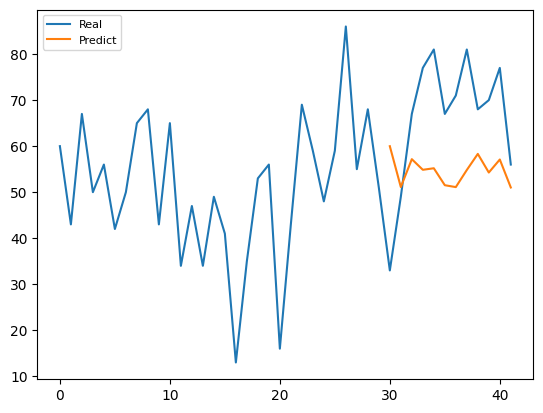

In [12]:
plt.plot(df,label='Real')

plt.plot(predictions,label='Predict')

plt.legend(loc='upper left',fontsize=8)

plt.show()

In [13]:
from sklearn.metrics import mean_squared_error  

mse = mean_squared_error(test, predictions)  

rmse = np.sqrt(mse)  

rmse

18.413687583937637

In [14]:
#1871년부터 1970년까지의 나일강 유량 데이터

import pandas as pd

df = pd.read_csv('c:/data/time/nile.csv')

df

,x
0,1120
1,1160
2,963
3,1210
4,1160
...,...
95,746
96,919
97,718
98,714


<Axes: >

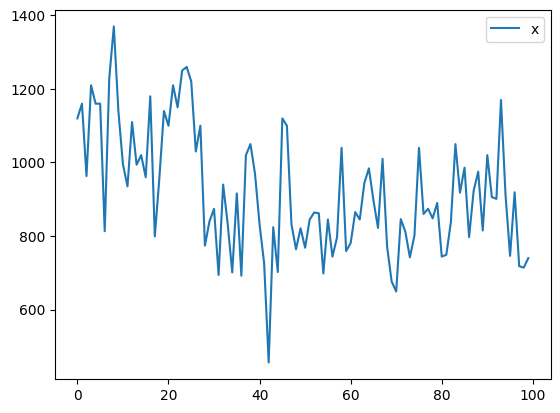

In [15]:
df.plot()

<Axes: >

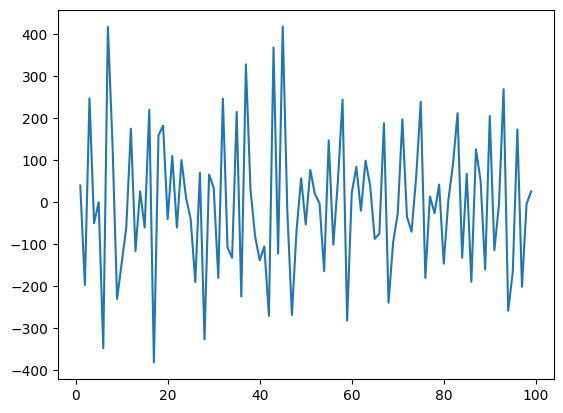

In [16]:
#1차 차분 데이터

diff1=df['x'].diff(periods=1).iloc[1:]

diff1.plot()



In [17]:
from statsmodels.tsa.stattools import adfuller

import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인

diff1=np.log(df['x']).diff(periods=1).iloc[1:]

result=adfuller(diff1)

print(result)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

(-4.7484147860124795, 6.818878743916549e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF Statistic: -4.748415
p-value: 0.000068


In [18]:
from pmdarima.arima import auto_arima
model = auto_arima(df,suppress_warnings=True)

model

#가장 적절한 모형은 arima(1,1,1)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
#학습용,검증용 구분

n=int(df.shape[0]*.8)

train = df[:n]

test = df[n:]

print(len(df['x']))

print(train['x'].values)

print(test['x'].values)



100
[1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994
 1020  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100
  774  840  874  694  940  833  701  916  692 1020 1050  969  831  726
  456  824  702 1120 1100  832  764  821  768  845  864  862  698  845
  744  796 1040  759  781  865  845  944  984  897  822 1010  771  676
  649  846  812  742  801 1040  860  874  848  890]
[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]


In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1)).fit()

predictions = model.predict(start=1, end=len(test), dynamic=False)

predictions.index=len(train)+(predictions.index-1)

predictions

80    1108.694660
81    1138.469883
82    1036.627963
83    1142.449874
84    1132.672522
85    1137.599690
86     991.285065
87    1139.596737
88    1211.331147
89    1139.844054
90    1080.867168
91    1044.754123
92    1100.176361
93    1055.036289
94    1057.275677
95    1028.422849
96    1106.927009
97     965.131282
98    1006.482027
99    1072.345243
Name: predicted_mean, dtype: float64

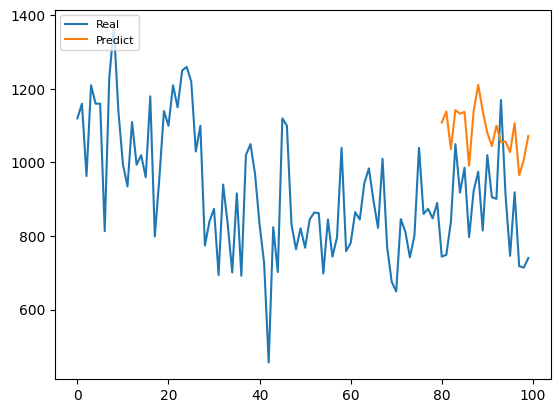

In [21]:
import matplotlib.pyplot as plt

plt.plot(df,label='Real')

plt.plot(predictions,label='Predict')

plt.legend(loc='upper left',fontsize=8)

plt.show()

In [25]:
from sklearn.metrics import mean_squared_error  
mse = mean_squared_error(test, predictions)  

rmse = np.sqrt(mse)

rmse

236.31497040529013

In [31]:
# 비트코인 시세 예측

import pandas as pd

df = pd.read_csv('c:/data/coin/market-price.csv')

df

,date,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


<Axes: >

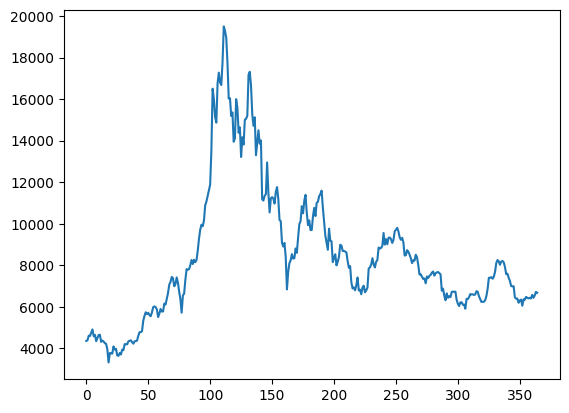

In [32]:
df['price'].plot()

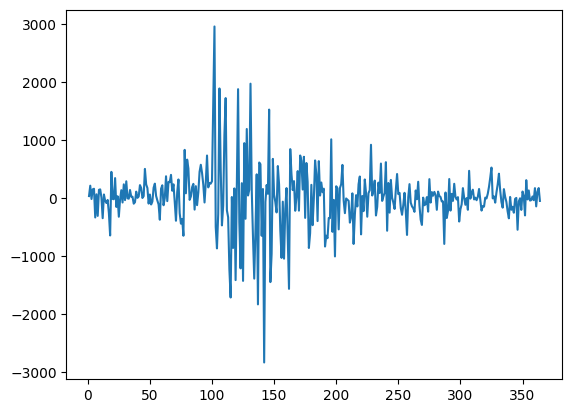

In [33]:
#1차 차분 데이터

import matplotlib.pyplot as plt

diff1=df['price'].diff(periods=1).iloc[1:]

diff1.plot()

plt.show()

In [34]:
from statsmodels.tsa.stattools import adfuller

import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인

diff1=np.log(df['price']).diff(periods=1).iloc[1:]

result=adfuller(diff1)

print(result)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

#p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

(-7.390010724986972, 8.046990224984235e-11, 4, 359, {'1%': -3.4486972813047574, '5%': -2.8696246923288418, '10%': -2.571077032068342}, -1099.7979101893807)
ADF Statistic: -7.390011
p-value: 0.000000


In [35]:
from pmdarima.arima import auto_arima

model = auto_arima(df['price'],suppress_warnings=True)

model

#가장 적절한 모형은 arima(1,1,0)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
#학습용,검증용 구분

n=int(df.shape[0]*.8)
print(n)
train = df[:n]

test = df[n:]

print(len(df['price']))

print(train['price'].values)

print(test['price'].values)

292
365
[ 4354.30833333  4391.67351667  4607.98545     4594.98785
  4748.255       4911.74001667  4580.38748     4648.15998333
  4344.09831667  4488.72014     4641.82201667  4654.6585
  4310.75018333  4375.55952     4329.955       4248.09001667
  4219.03661667  3961.27126667  3319.63        3774.26528333
  3763.62604     3746.06078333  4093.31666667  3943.41333333
  3977.56166667  3658.89818333  3637.50255     3776.3869
  3703.04065     3942.555       3910.30738333  4202.55498333
  4201.98905     4193.57466667  4335.36831667  4360.72296667
  4386.88375     4293.3066      4225.175       4338.852
  4345.60333333  4376.19166667  4602.28088333  4777.96781667
  4782.28        4819.48576667  5325.13068333  5563.80656667
  5739.43873333  5647.31166667  5711.20586667  5603.71294
  5546.1761      5727.6335      5979.45984     6020.37168333
  5983.18455     5876.07986667  5505.82776667  5669.62253333
  5893.13841667  5772.50498333  5776.69695     6155.43402
  6105.87422     6388.64516667  6665.3

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['price'], order=(1,1,0)).fit()

predictions = model.predict(start=1, end=len(test), dynamic=False)

predictions.index=len(train)+(predictions.index-1)

predictions

292    4423.837993
293    4394.104982
294    4622.061518
295    4594.142057
296    4758.228555
          ...     
360    7206.160027
361    7453.149337
362    7373.073436
363    6963.827198
364    7098.833369
Name: predicted_mean, Length: 73, dtype: float64

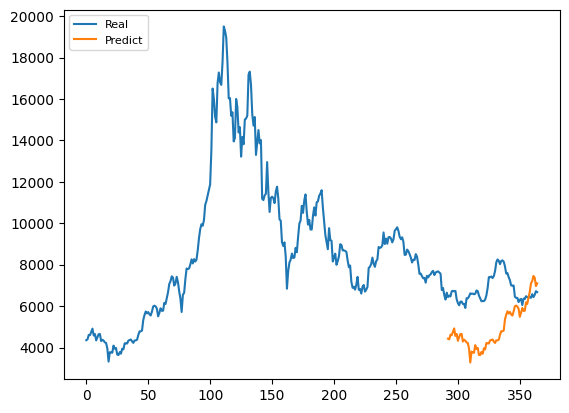

In [38]:
plt.plot(df['price'],label='Real')

plt.plot(predictions,label='Predict')

plt.legend(loc='upper left',fontsize=8)

plt.show()

In [39]:
import numpy as np

# 오차계산
def _error(real, pred):
    return real - pred
#평균제곱오차
def mse(real, pred):
    return np.mean(np.square(_error(real, pred)))
def rmse(real, pred):
    return np.sqrt(mse(real, pred))
def mae(real, pred):
    return np.mean(np.abs(_error(real, pred)))

METRICS = {
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
}

def evaluate(real, pred, metrics=("mse", "rmse", "mae")):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](real, pred)
        except:
            results[name] = np.nan
    return results

In [40]:
evaluate(test['price'].values, predictions.values)

{'mse': 4854557.464442859, 'rmse': 2203.306030591951, 'mae': 1932.261537354878}

In [2]:
#순환신경망

#사인곡선
import numpy as np

a=np.arange(0, 10, 0.5)

print(len(a),a) #0~10까지 0.5 간격으로 값 생성

data = np.sin(a)

print(data)

print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [3]:
#data=[1,2,3,4,5,6,7,8,9,10]

timestep = 3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측

X, y = [], []

for i in range(timestep, len(data)):

    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))

    y.append(data[i])

    

print(X)    

print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [4]:
#신경망에 입력하기 위해 차원 변경

X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)

print(X.shape)

print(y.shape)

(17, 3, 1)
(17, 1)


In [10]:

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM

np.random.seed(0)

model=Sequential()

# units 출력노드수

model.add(SimpleRNN(units=10, input_shape=(3, 1)))
                #   output    입력자료형(타임스텝,변수개수)
#model.add(LSTM(units=10, input_shape=(3, 1))) #오차가 많이남

model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='linear'))
        # 출력노드 1개
model.compile(loss='mse', optimizer='sgd')

model.summary()

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from datetime import datetime  

import tensorflow as tf  

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  

logdir

'c:/logs/20240401-141459'

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(X, y, epochs=1000,callbacks=[tensorboard_callback])

#cmd에서 실행

#tensorboard --logdir=c:/logs/20230508-153907

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 0.4043
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3988
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3938
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3894
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3855
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.3820
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.3787
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3754
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3724
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3698
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3678
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3659
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3641
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3624
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.3609
Epoch 16/1000
1/1 ━━━━

In [13]:
model.evaluate(X,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1650


0.16502010822296143

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


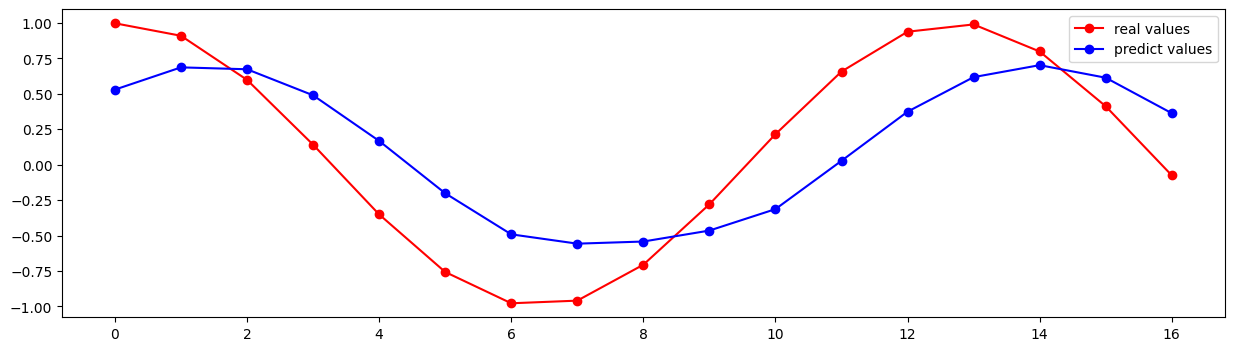

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 4))
plt.plot(data[3:], 'ro-', label='real values') # 실제값

#예측값

plt.plot(model.predict(X), 'bo-', label='predict values')

plt.legend()

plt.show()

In [1]:
# 주가예측
import pandas as pd

df = pd.read_csv('c:/data/time/data2.csv')

df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [2]:
#전처리

# 문자열 변수 date 를 datetime 타입으로 변경

df['date'] = pd.to_datetime(df['date'])

# 이 날짜를 index로 설정

df = df.set_index('date')

df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


In [ ]:
df.plot()

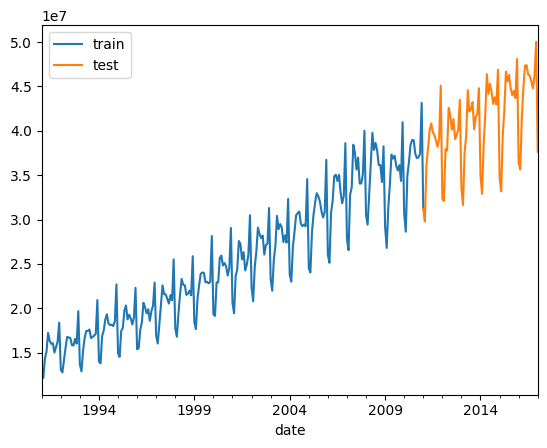

In [3]:
#인덱스가 0,1,2,3 ... 에서 날짜로 변경됨

#학습할 변수는 date

import matplotlib.pyplot as plt

split_date = pd.Timestamp('01-01-2011')

# 학습용: 2011/1/1까지의 자료

# 검증용: 이후 자료

train = df.loc[:split_date, ['price']]

test = df.loc[split_date:, ['price']]
ax = train.plot()

test.plot(ax=ax)

plt.legend(['train', 'test'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

sc.fit(train)

train_sc = sc.transform(train)

test_sc = sc.transform(test)

train_sc[:10]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526]])

In [5]:
#넘파이배열을 데이터프레임으로 변환

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)

test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

train_sc_df.head()

,Scaled
date,
1991-01-01,0.014020
1991-02-01,0.000000
1991-03-01,0.070426
1991-04-01,0.095318
1991-05-01,0.163628


In [6]:
s = pd.Series([100, 200, 300])

s2 = s.shift(1) 

print(s)

print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [7]:
for s in range(1, 13):

    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)

    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)
#과거값 12개로 현재값을 예측하고자 함

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [8]:
#결측값 NaN 제거

#독립변수 : shift_1 ~ shift_12

X_train = train_sc_df.dropna().drop('Scaled', axis=1)

#종속변수 : Scaled

y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)

y_test = test_sc_df.dropna()[['Scaled']]

In [9]:
#넘파이배열로 저장

X_train = X_train.values

X_test= X_test.values

y_train = y_train.values

y_test = y_test.values

#print(X_train.shape)

print(X_train)

#print(y_train_shape)

print(y_train)

[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]
 [1.         0.81482896 0.80210057 ... 0.73605008 0.53166512 0.59734863]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]
 [0.181320

In [11]:
# 케라스에 필요한 3차원 형태로 변환

# RNN에는 시간 개념이 있기 때문에 차원이 추가됨

# [size,timestep,변수개수]

X_train_t = X_train.reshape(X_train.shape[0], 12, 1)

X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")

print(X_train_t.shape)

print(X_train_t)

print(y_train)

최종 DATA
(229, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]

 [[1.        ]
  [0.81482896]
  [0.80210057]
  ...
  [0.73605008]
  [0.53166512]
  [0.59734863]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [12]:
from keras.layers import LSTM

from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(LSTM(20, input_shape=(12, 1))) # (timestep, 변수개수)

model.add(Dense(1)) # 출력층의 노드 개수 1

#mean_squared_error 연속적인 값 예측

model.compile(loss='mse', optimizer='adam')

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3421  
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2733 
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2103 
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1568 
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1116 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851 
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0561 
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351 
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215 
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 
Epoch 16/250
4/4 ━

In [14]:
score=model.evaluate(X_test_t, y_test, verbose=0)

print(score) #평균제곱오차

y_pred = model.predict(X_test_t)

print(y_pred.flatten()[:10])

print(y_test.flatten()[:10])

0.006830960512161255
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[0.72768867 0.72830635 0.8261086  0.86002445 0.8890154  0.89968383
 0.8851047  0.8793792  0.87015384 0.8619155 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [15]:
import numpy as np

#실제값-예측값의 평균값

np.mean(y_test - y_pred)

0.036612509905482774

In [16]:
y_predicted = sc.inverse_transform(y_pred)  

y_tested = sc.inverse_transform(y_test)  

np.mean(y_tested - y_predicted)

1134754.3278688525

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


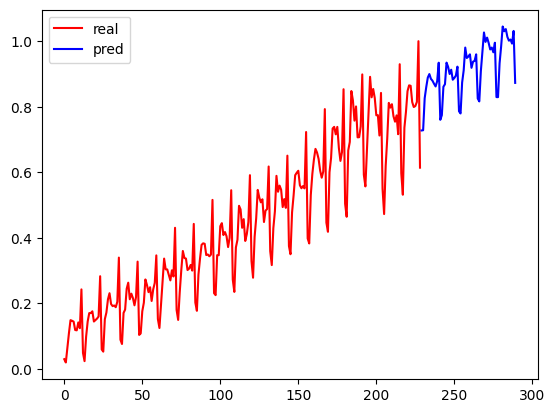

In [17]:
import matplotlib.pyplot as plt

pred=model.predict(X_test_t)

a=np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))

b=np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))

plt.plot(a, 'r-', label='real')

plt.plot(b, 'b-', label='pred')

plt.legend()

plt.show()

In [18]:
# 시계열모형의 성능 평가
import warnings

warnings.filterwarnings("ignore")

In [19]:
import pandas as pd  

air_pollution = pd.read_csv('c:/data/time/air_pollution.csv', parse_dates=['date'])

air_pollution.set_index('date', inplace=True)

air_pollution.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [20]:
air_pollution.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


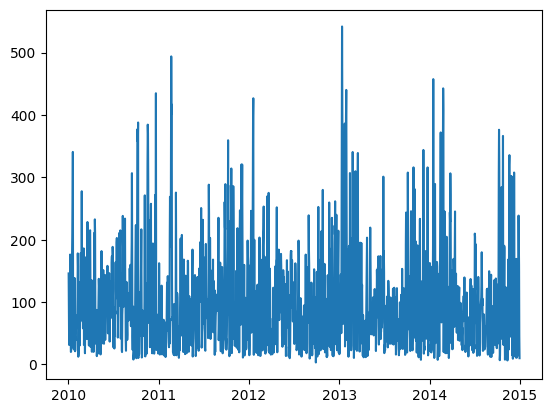

In [21]:
from matplotlib import pyplot as plt

plt.plot(air_pollution.pollution_today)

plt.show()

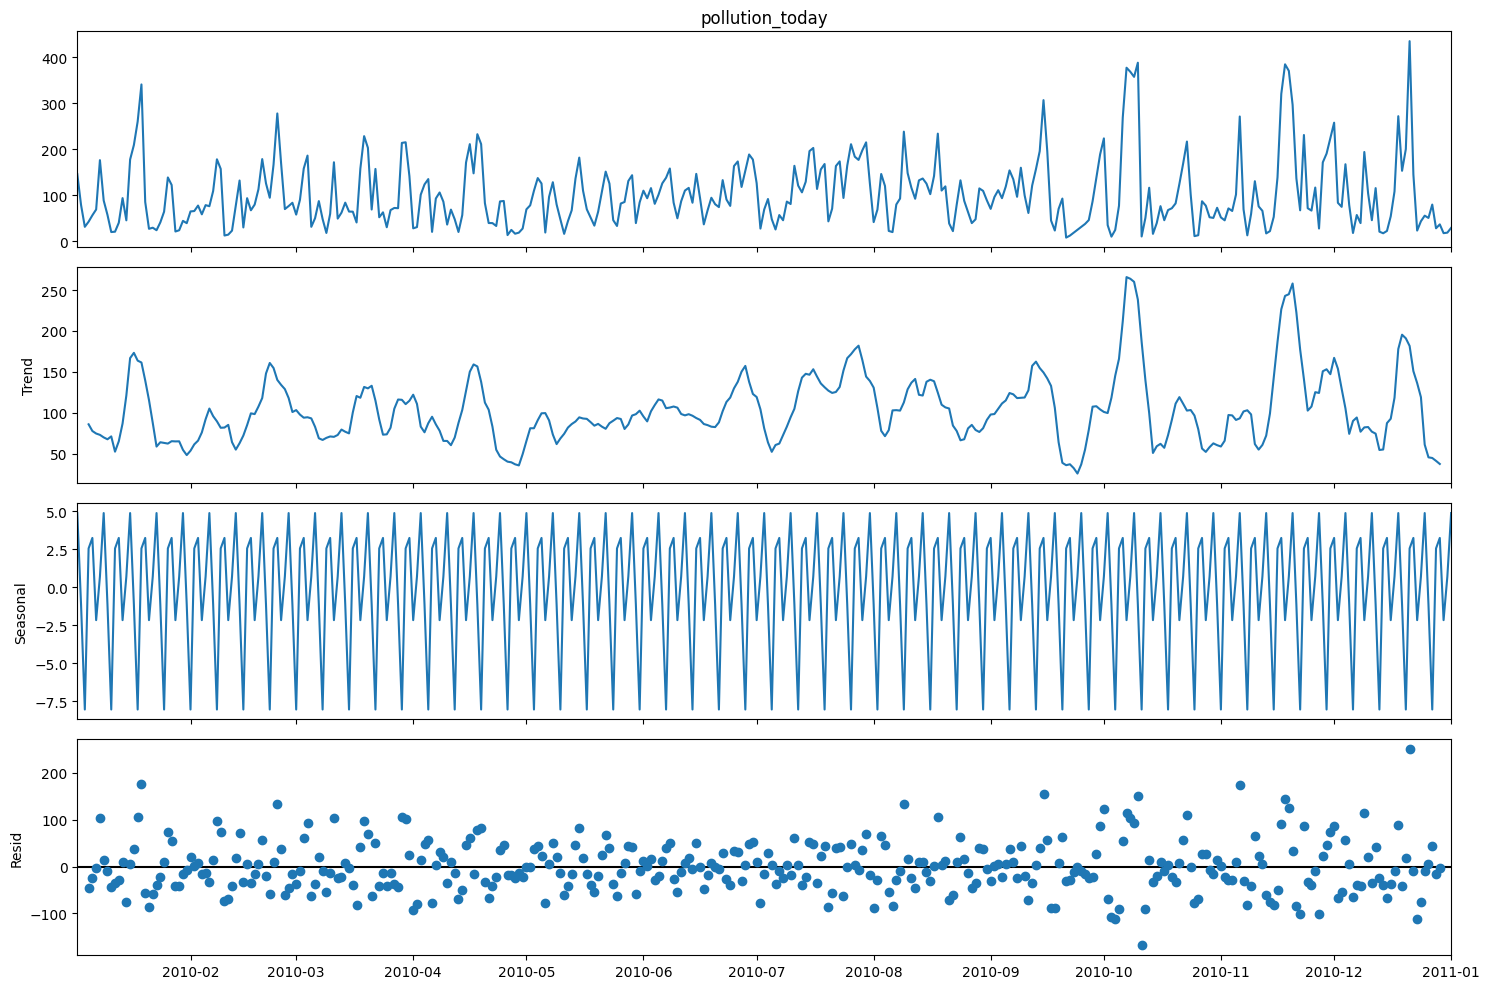

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams

series = air_pollution.pollution_today[:365] #처음 1년간의 자료

result = seasonal_decompose(series) #시계열 성분 분해

rcParams['figure.figsize'] = 15, 10

result.plot()

plt.show()

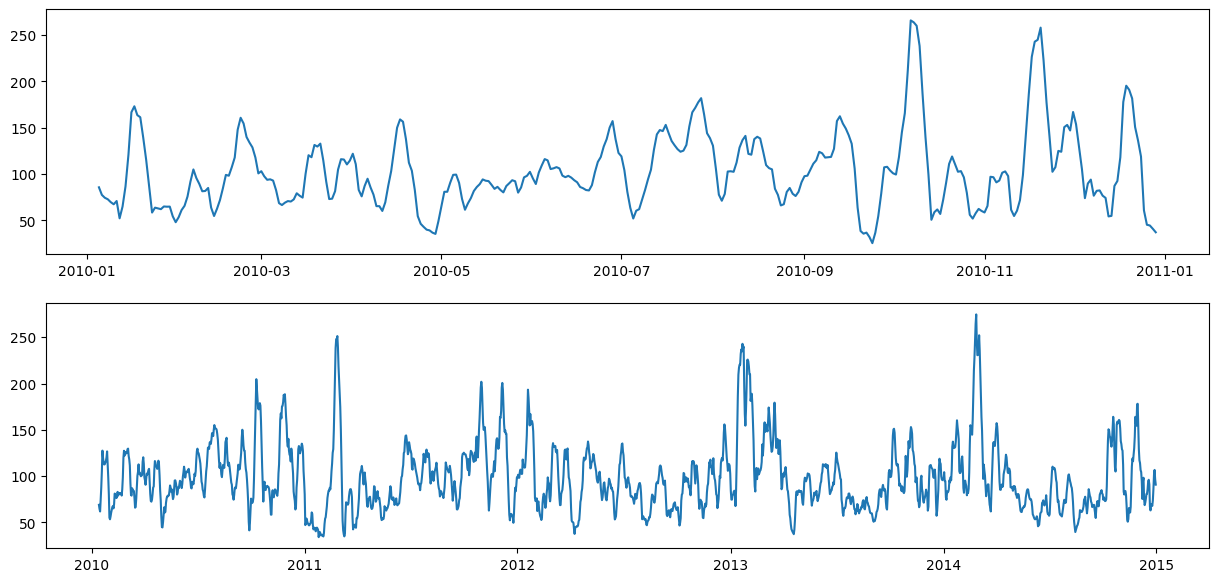

In [23]:
fig = plt.figure(figsize=(15, 7))

layout = (2, 2)

pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)

mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

pm_ax.plot(result.trend) #전체 기간

mm = air_pollution.pollution_today.rolling(12).mean() #이동평균(12일간)

mv_ax.plot(mm)

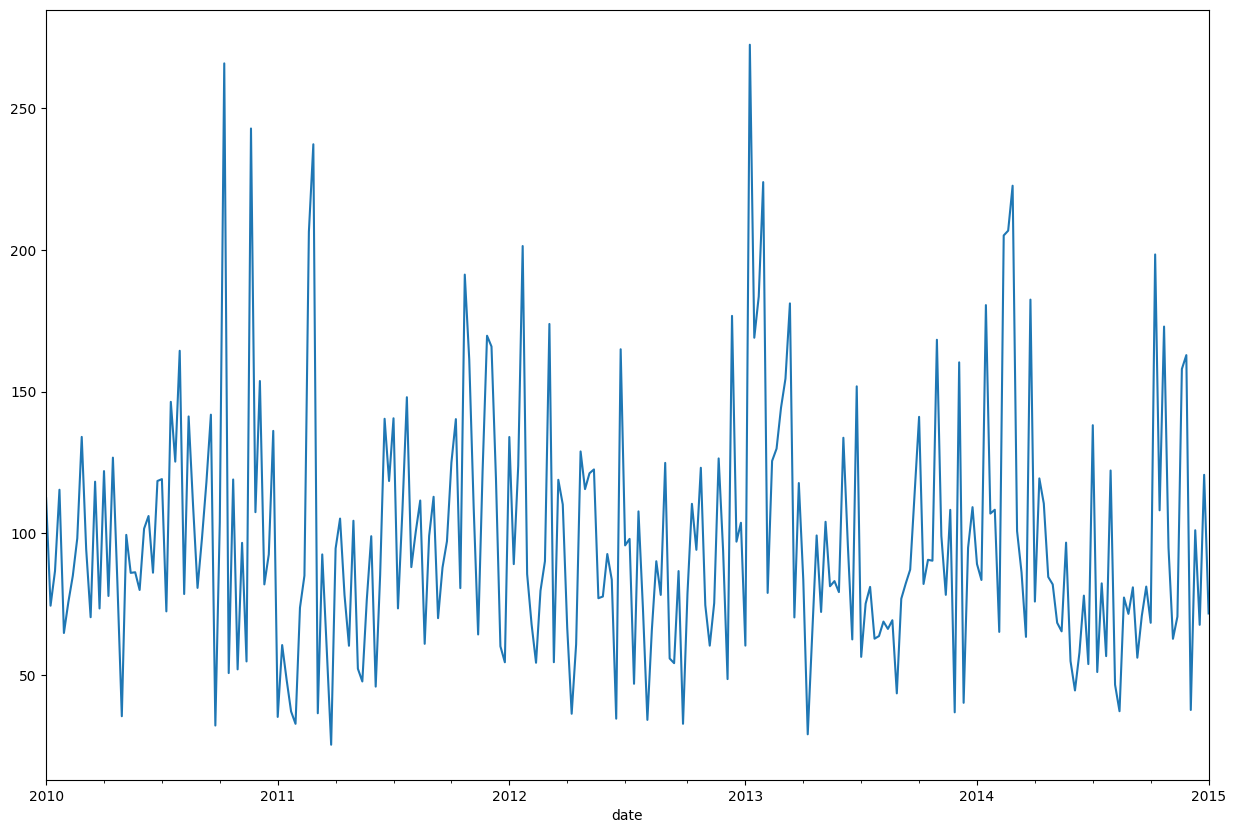

In [24]:
resample = air_pollution.resample('W') #시계열데이터를 주단위로 리샘플링

weekly_mean = resample.mean()

weekly_mean.pollution_today.plot()

plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

X = air_pollution.pollution_today.values

result = adfuller(X)

print('p-value: %f' % result[1])

p-value: 0.000000


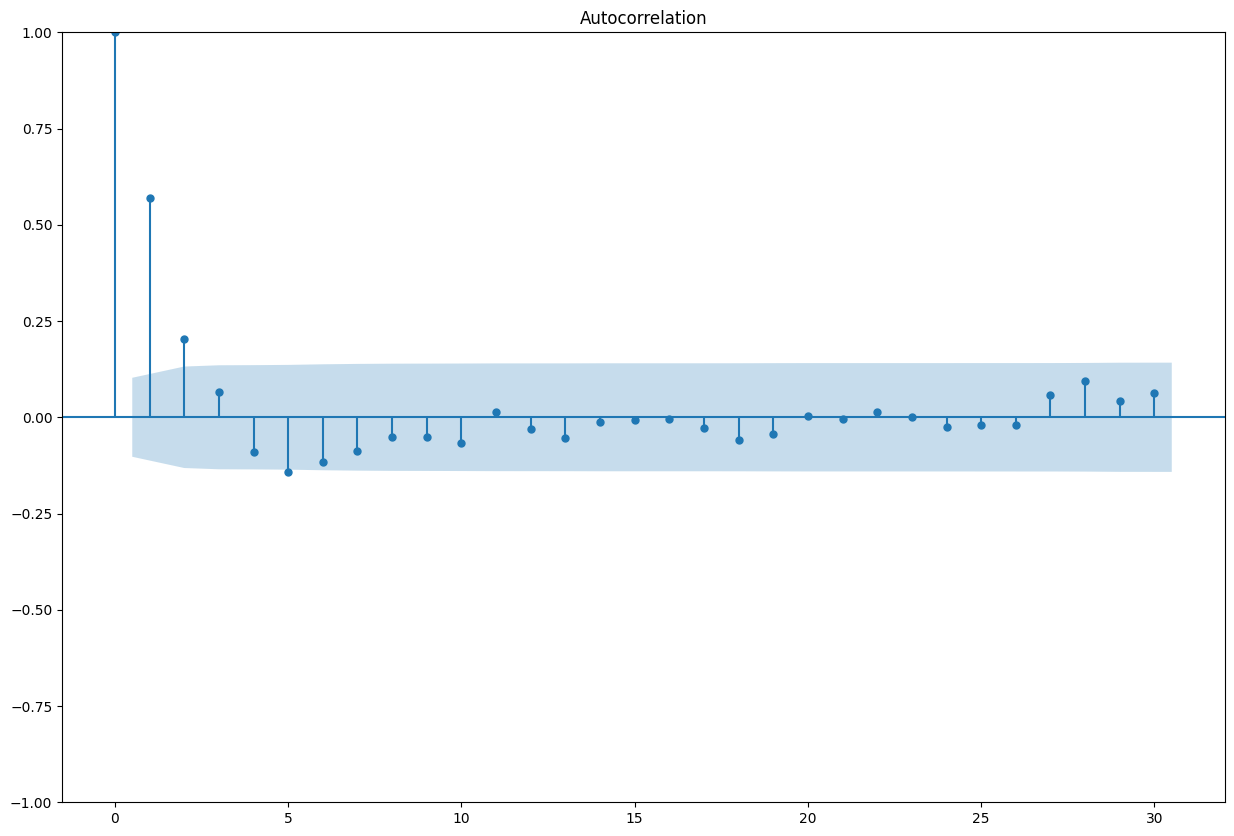

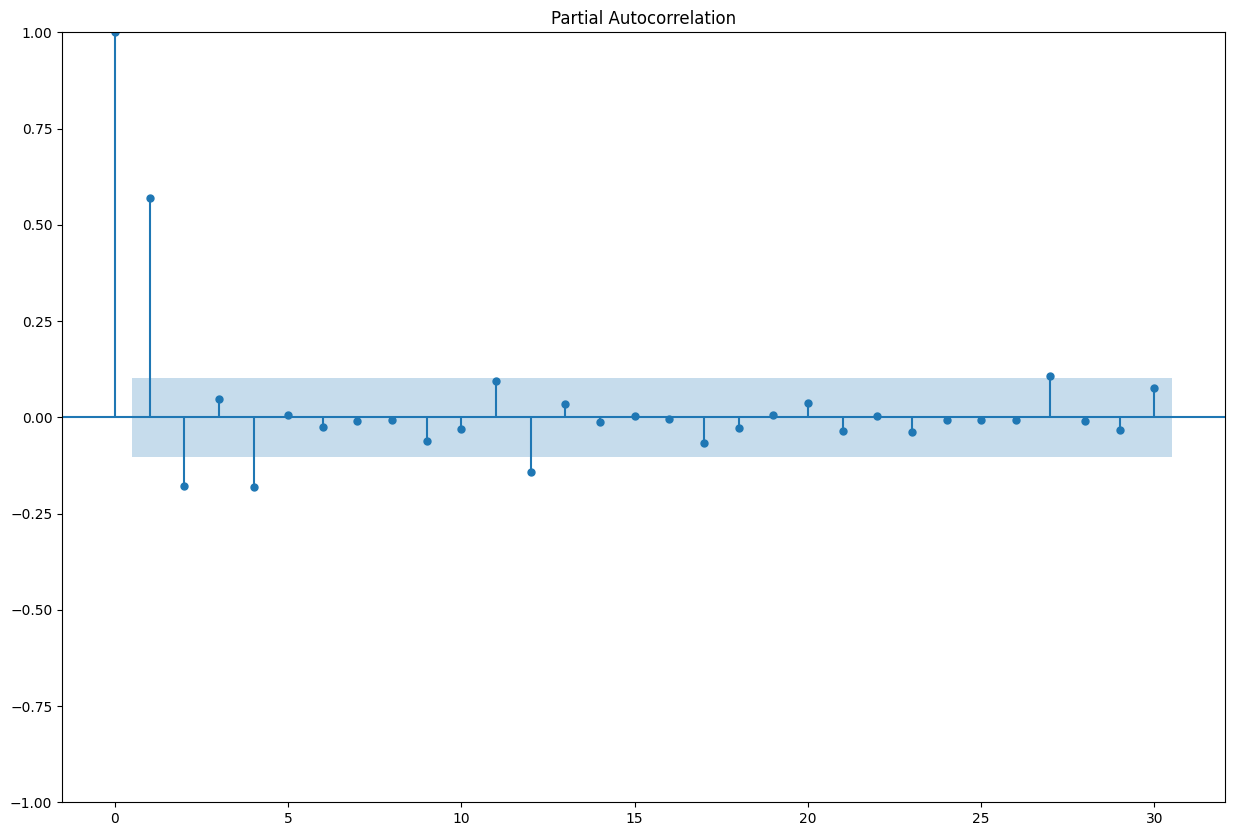

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf와 pacf를 통해 적합한 arima 모형 결정
# acf(자기상관함수, 타임스텝과의 상관관계), pacf(부분자기상관함수, 다른 요인을 배제한 순수한 상호연관성) , x축 - lag 시차
# lag 0 시점은 읽지 않음(자기자신과 같으므로 1)
# lag 3부터 점선 안에 존재함 lag 절단값은 3 => MA(3)
plot_acf(series, lags=30)

plot_pacf(series, lags=30)

# 절단값이 명확하지 않아 AR 모형 확정이 어려운 상태

plt.show()

In [27]:
resultsDict = {}

predictionsDict = {}

split_date = '2014-01-01'

df_training = air_pollution.loc[air_pollution.index <= split_date]

df_test = air_pollution.loc[air_pollution.index > split_date]

print(len(df_training))

print(len(df_test))

1461
364


In [28]:
import pmdarima as pm

autoModel = pm.auto_arima(df_training.pollution_today,

                          error_action='ignore', suppress_warnings=True, seasonal=False)

autoModel.fit(df_training.pollution_today)

ARIMA(order=(0, 0, 3), scoring_args={}, suppress_warnings=True)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_training.pollution_today, order=(0,0,3)).fit()

c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
import numpy as np

from sklearn.metrics import r2_score

def _error(real, pred):

    return real - pred

def mse(real, pred):

    return np.mean(np.square(_error(real, pred)))

def rmse(real, pred):

    return np.sqrt(mse(real, pred))

def mae(real, pred):

    return np.mean(np.abs(_error(real, pred)))

METRICS = {

    "mse": mse,

    "rmse": rmse,

    "mae": mae,

    "r2": r2_score,

}

def evaluate(real, pred, metrics=("mse", "rmse", "mae", "r2")):

    results = {}

    for name in metrics:

        try:

            results[name] = METRICS[name](real, pred)

        except:

            results[name] = np.nan

    return results

In [33]:
from tqdm import tqdm

#시간이 오래걸림

index = len(df_training)

yhat = list()

for t in tqdm(range(len(df_test.pollution_today))):

    temp_train = air_pollution[:len(df_training)+t]

    model = ARIMA(temp_train.pollution_today, order=(0, 0, 3))

    model_fit = model.fit()

    predictions = model_fit.predict(

        start=len(temp_train), end=len(temp_train), dynamic=False)

    yhat = yhat + [predictions]

yhat = pd.concat(yhat)

resultsDict['ARIMA'] = evaluate(df_test.pollution_today, yhat.values)

predictionsDict['ARIMA'] = yhat.values

  0%|          | 0/364 [00:00<?, ?it/s]

c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\python312\Lib\site-packages\stat

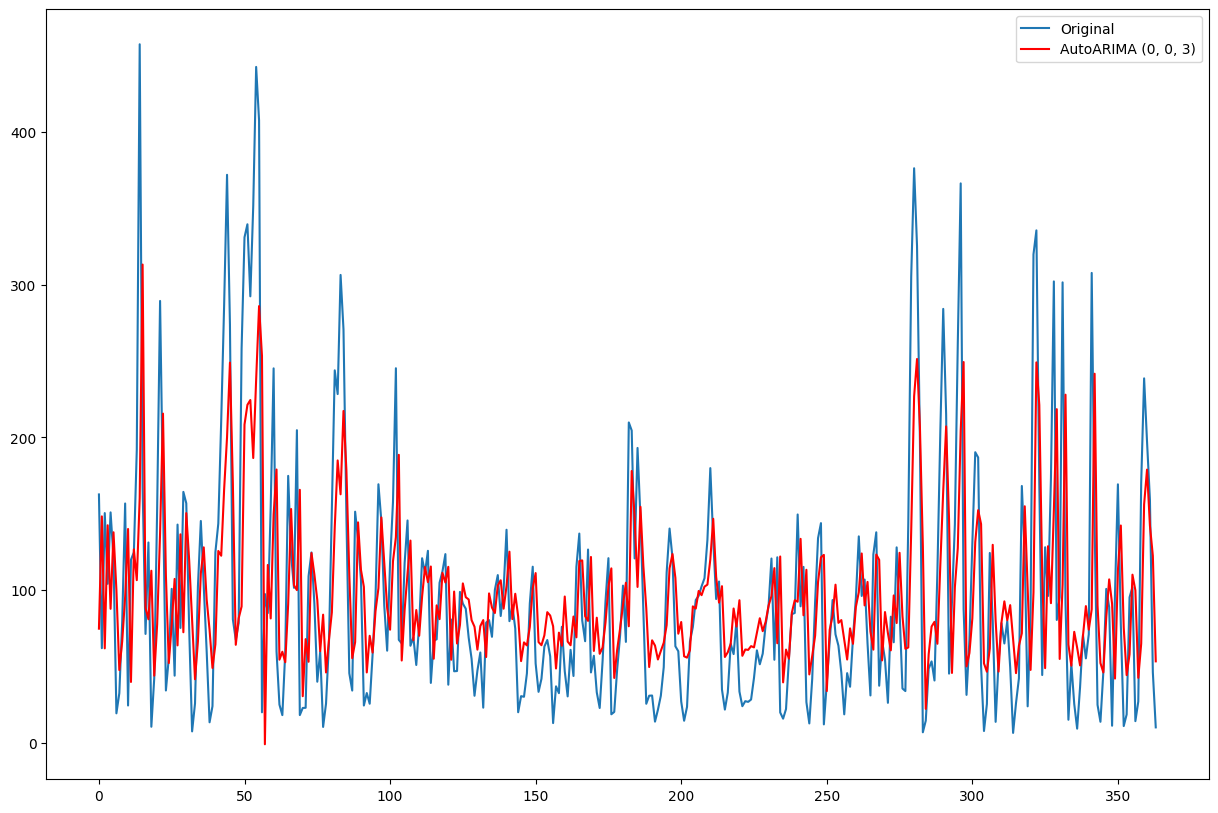

In [34]:
order = autoModel.order

plt.plot(df_test.pollution_today.values, label='Original')

plt.plot(yhat.values, color='red', label='AutoARIMA {0}'.format(order))

plt.legend()

plt.show()

In [35]:
def create_time_features(df, target=None):

    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    X = df.drop(['date'], axis=1)

    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [36]:
from sklearn.preprocessing import StandardScaler

X_train_df, y_train = create_time_features(df_training, target='pollution_today')
X_test_df, y_test = create_time_features(df_test, target='pollution_today')
scaler = StandardScaler()
scaler.fit(X_train_df)  
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)
X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['LinearRegression'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['LinearRegression'] = yhat

In [38]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=0)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['RF'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['RF'] = yhat



In [41]:
from xgboost import XGBRegressor

reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

reg.fit(X_train, y_train,verbose=False)  

yhat = reg.predict(X_test)

resultsDict['XGBoost'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['XGBoost'] = yhat

In [43]:
from lightgbm import LGBMRegressor

lightGBM = LGBMRegressor()

lightGBM.fit(X_train, y_train)
yhat = lightGBM.predict(X_test)

resultsDict['Lightgbm'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['Lightgbm'] = yhat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2161
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 15
[LightGBM] [Info] Start training from score 98.287959


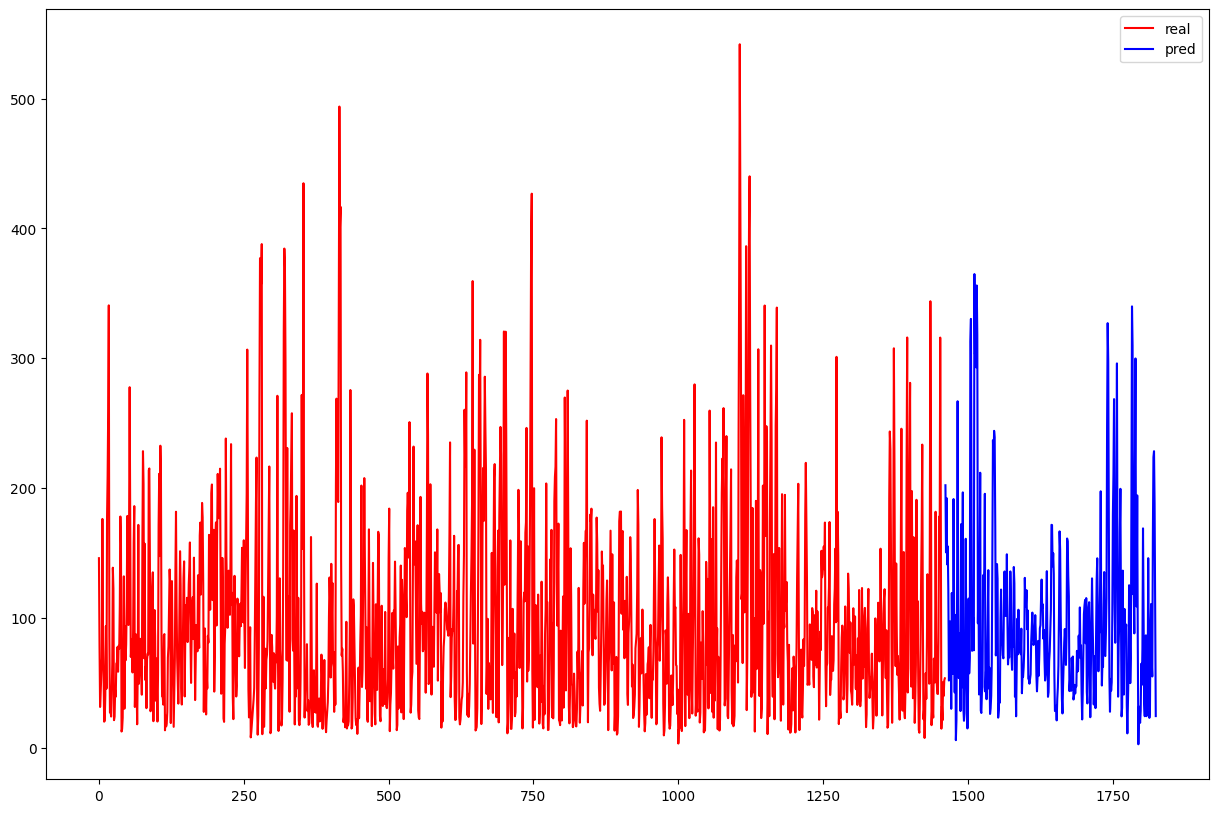

In [44]:
a=np.concatenate((df_training.pollution_today.values, np.zeros(len(X_train))+np.nan))

b=np.concatenate((np.zeros(len(X_train))+np.nan, yhat))

plt.plot(a, 'r-', label='real')

plt.plot(b, 'b-', label='pred')

plt.legend()

plt.show()

In [45]:
from sklearn.svm import SVR

reg = SVR(kernel='rbf', C=100, gamma=0.01)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['SVM'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['SVM'] = yhat

In [46]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=2)

reg.fit(X_train, y_train)

yhat = reg.predict(X_test)

resultsDict['KNN'] = evaluate(df_test.pollution_today, yhat)

predictionsDict['KNN'] = yhat

In [47]:
import tensorflow as tf

tf.random.set_seed(0)
BATCH_SIZE = 64
BUFFER_SIZE = 100
WINDOW_LENGTH = 24

#타임스텝 7로 설정
def window_data(X, Y, window=7):

    x = []
    y = []

    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)

X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))
X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]
train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [48]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM,Dense

dropout = 0.0

lstm_model = Sequential([

    LSTM(128, input_shape=X_train_w.shape[-2:], dropout=dropout),

    Dense(128),

    Dense(128),

    Dense(1)

])

lstm_model.compile(optimizer='rmsprop', loss='mae')

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,393 (419.50 KB)

 Trainable params: 107,393 (419.50 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#steps_per_epoch : 훈련 샘플수 / 배치 사이즈

model_history = lstm_model.fit(train_data, epochs=10,

                                      steps_per_epoch=200,

                                      validation_data=val_data, validation_steps=50)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 61.8292 - val_loss: 44.0121
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 38.3186 - val_loss: 35.4500
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 30.9970 - val_loss: 33.9718
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 27.5489 - val_loss: 31.7369
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 24.6157 - val_loss: 30.5922
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 22.8469 - val_loss: 31.5786
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 20.5353 - val_loss: 34.3084
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 18.1641 - val_loss: 32.1469
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 16.1580 - val_loss: 33.4635
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 14.6648 - val_loss: 34.0558


In [50]:
yhat = lstm_model.predict(X_test_w).reshape(1, -1)[0]
resultsDict['LSTM'] = evaluate(y_test, yhat)
predictionsDict['LSTM'] = yhat

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [51]:
def bar_metrics(resultsDict):

    df = pd.DataFrame.from_dict(resultsDict)

    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    pallette = plt.cm.get_cmap("tab20c", len(df.columns))

    colors = [pallette(x) for x in range(len(df.columns))]

    color_dict = dict(zip(df.columns, colors))

    fig = plt.figure(figsize=(20, 15))

    fields=['mae','mse','rmse','r2']

    for idx,field in enumerate(fields):

        fig.add_subplot(2, 2, idx+1)

        plt.title(field.upper())

        df.loc[field].sort_values().plot(

            kind="bar",

            colormap="Paired",

            color=[color_dict.get(x, "#333333") for x in df.loc[field].sort_values().index],

        )

        plt.legend()

    

    plt.tight_layout()

    plt.show()

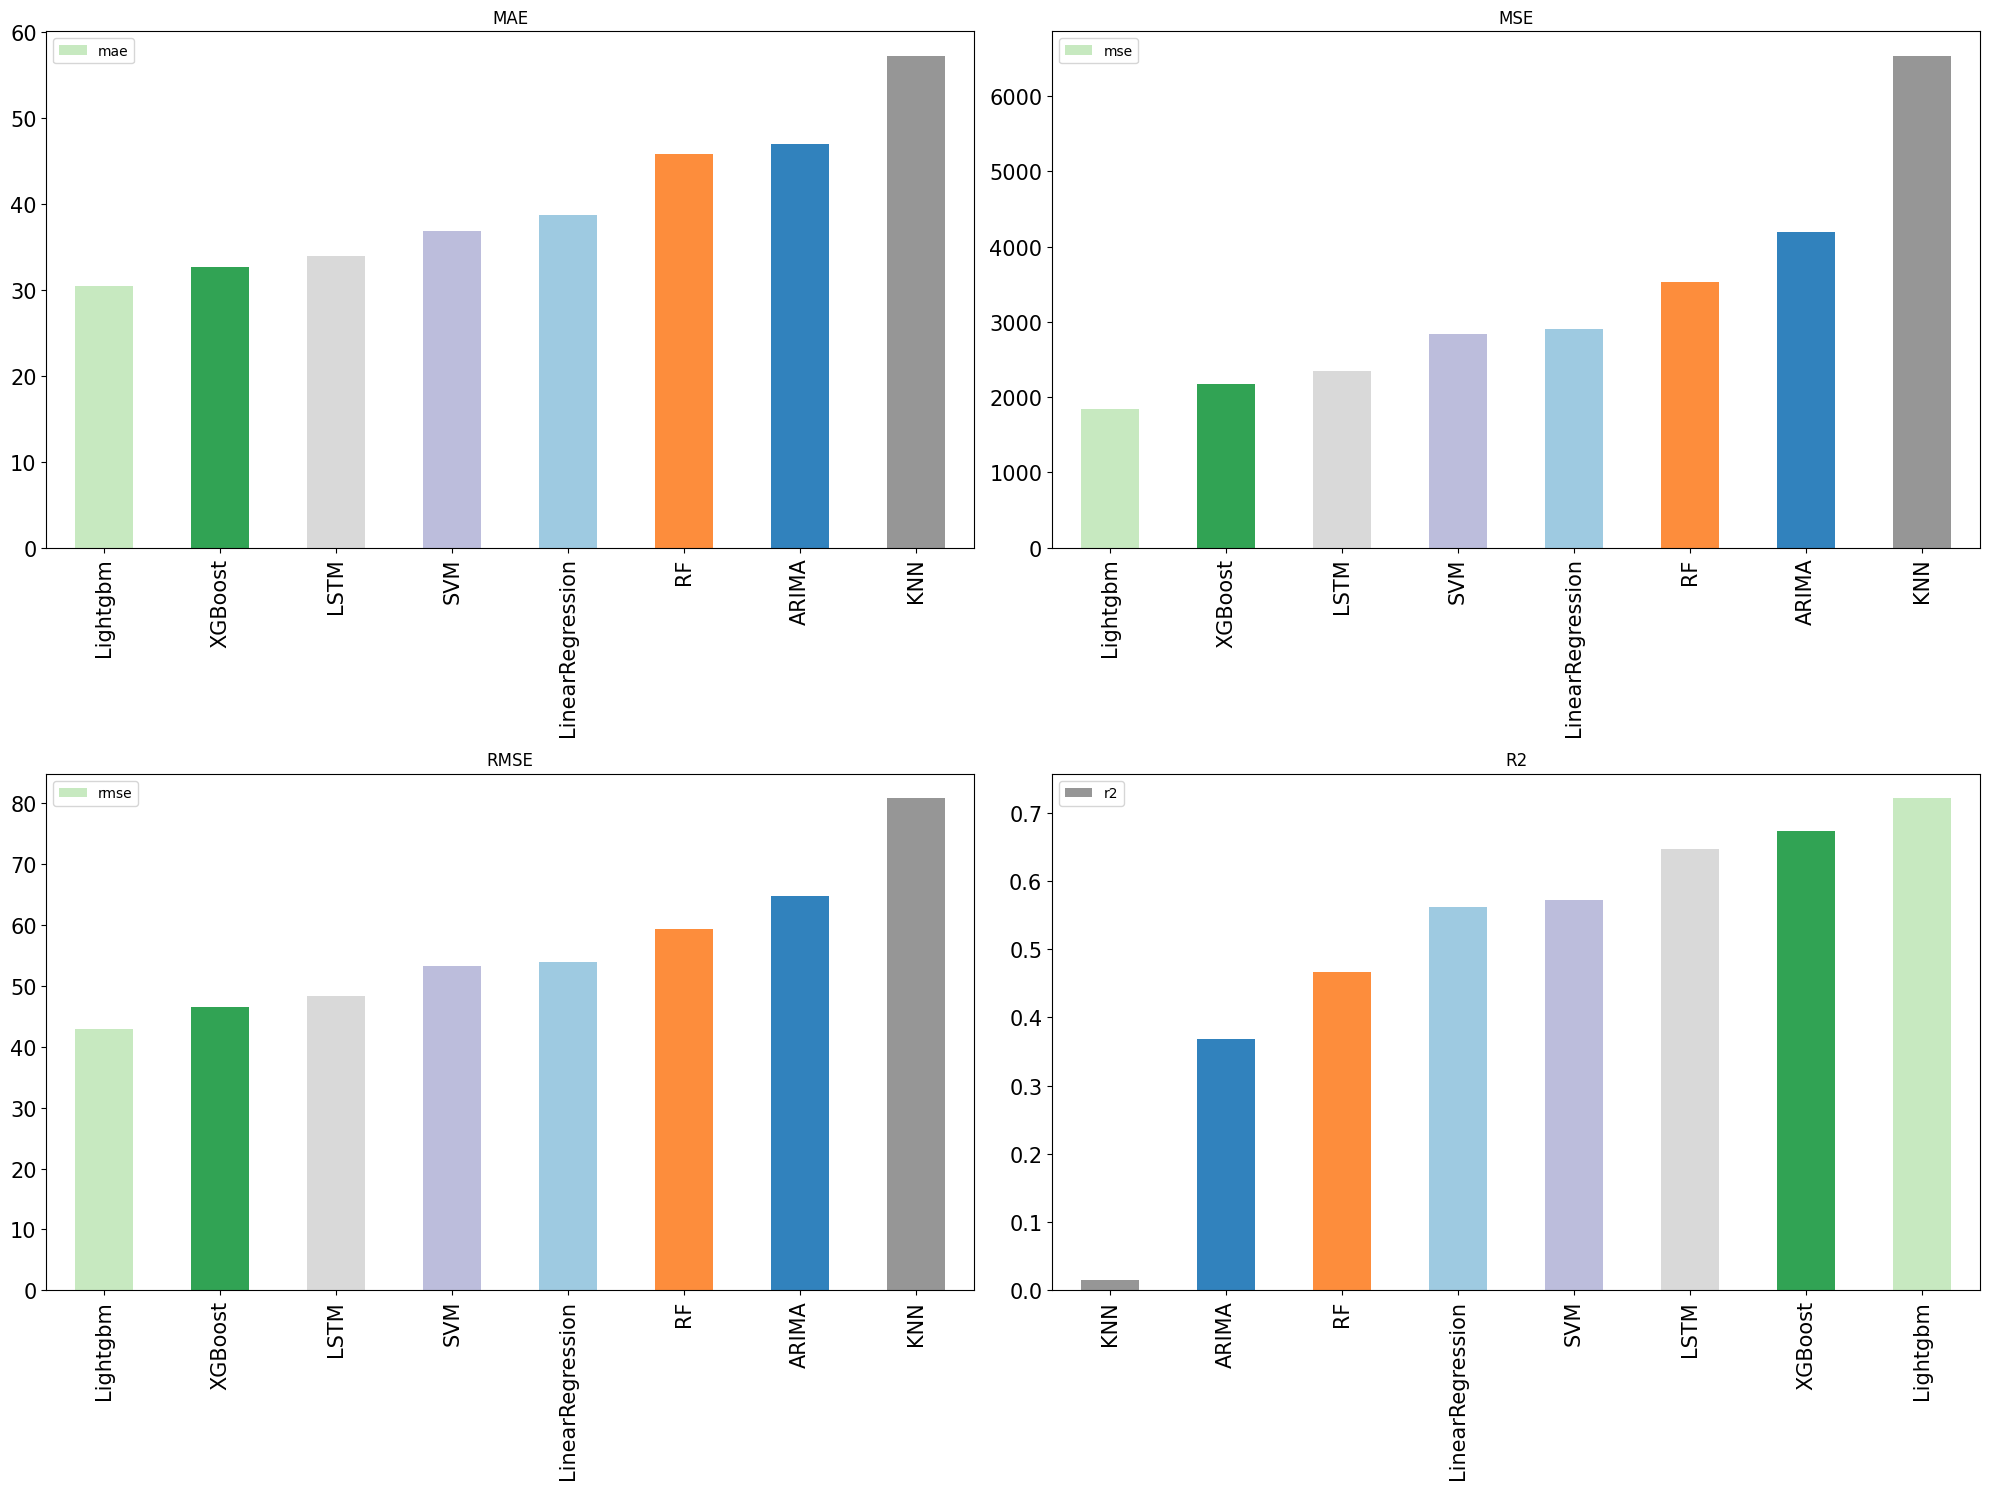

In [52]:
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

bar_metrics(resultsDict)

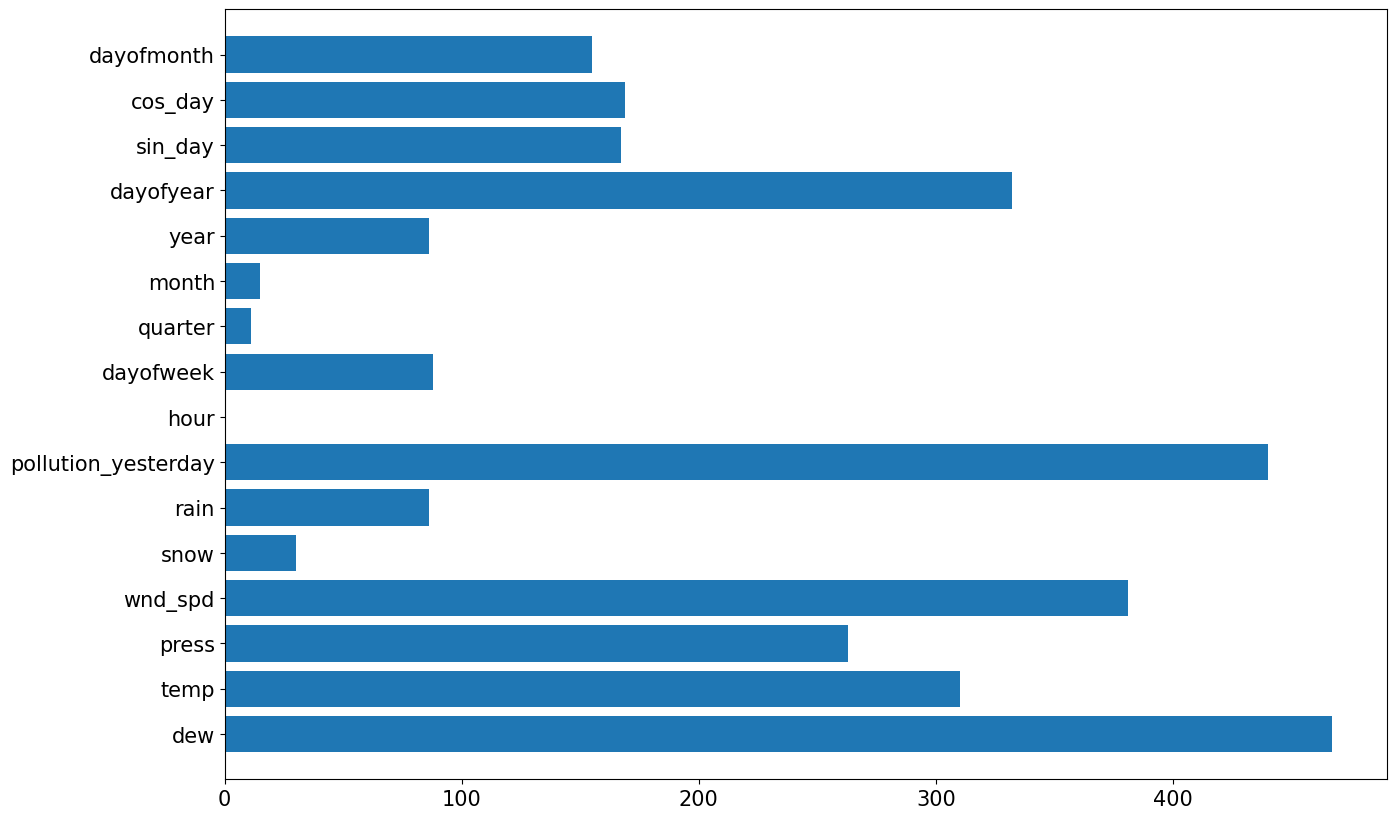

In [53]:
def plot_tree(model):

    n_features =X_train_df.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), X_train_df.columns)

    plt.ylim(-1, n_features)

#특성 중요도

plot_tree(lightGBM)

In [54]:
df = pd.DataFrame.from_dict(resultsDict).transpose().iloc[::-1]

df = df.round(2)

df

,mse,rmse,mae,r2
LSTM,2344.21,48.42,33.98,0.65
KNN,6532.55,80.82,57.23,0.02
SVM,2835.37,53.25,36.92,0.57
Lightgbm,1849.12,43.00,30.51,0.72
XGBoost,2168.84,46.57,32.66,0.67
RF,3534.18,59.45,45.84,0.47
LinearRegression,2904.99,53.90,38.74,0.56
ARIMA,4187.78,64.71,47.01,0.37


<BarContainer object of 8 artists>

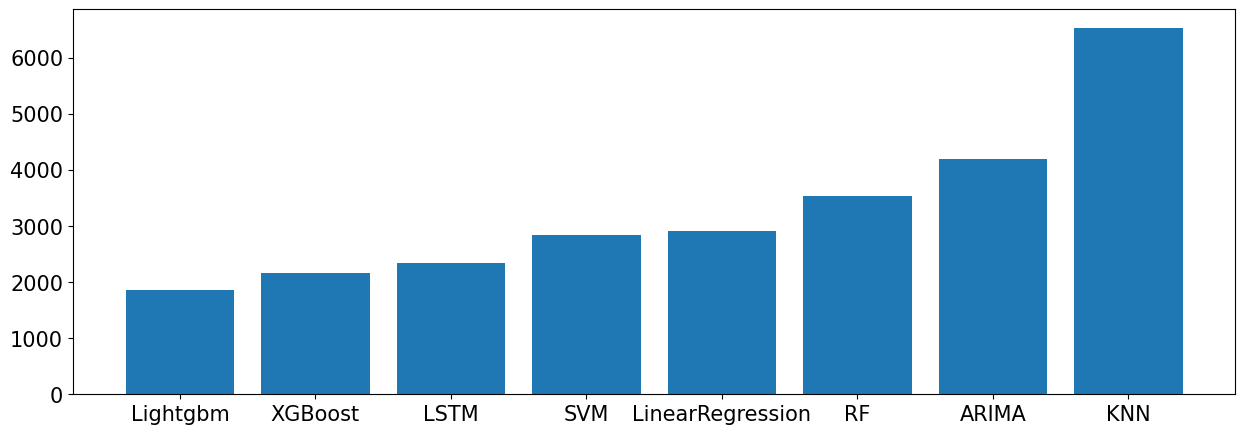

In [55]:
rcParams['figure.figsize'] = 15, 5

df_mse=df.sort_values(by='mse')

plt.bar(df_mse.index, df_mse.mse)

<BarContainer object of 8 artists>

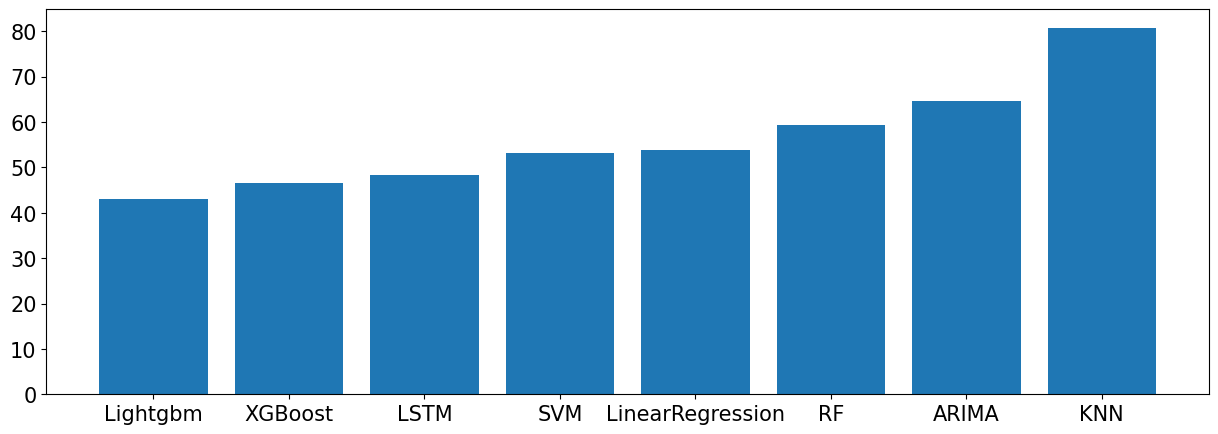

In [56]:
df_rmse=df.sort_values(by='rmse')

plt.bar(df_rmse.index, df_rmse.rmse)

<BarContainer object of 8 artists>

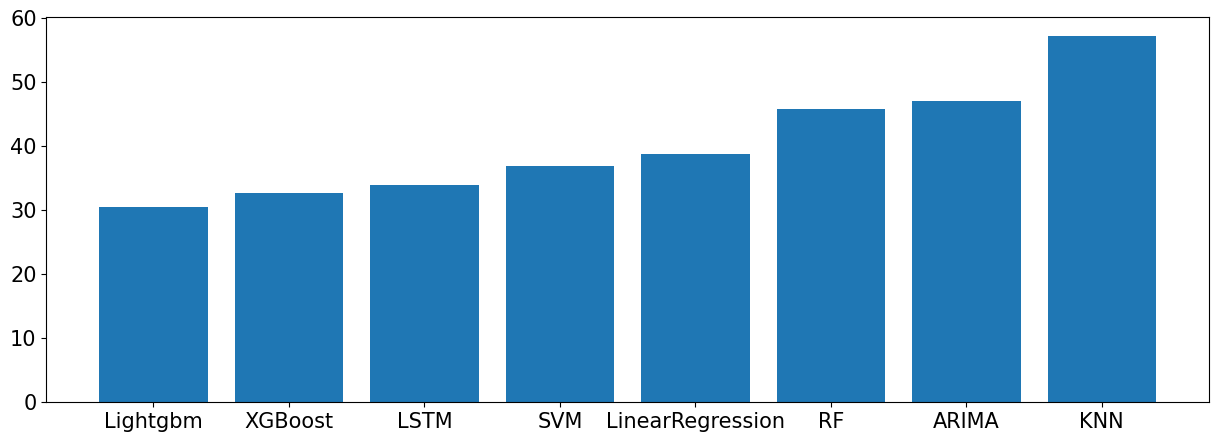

In [57]:
df_mae=df.sort_values(by='mae')

plt.bar(df_mae.index, df_mae.mae)

<BarContainer object of 8 artists>

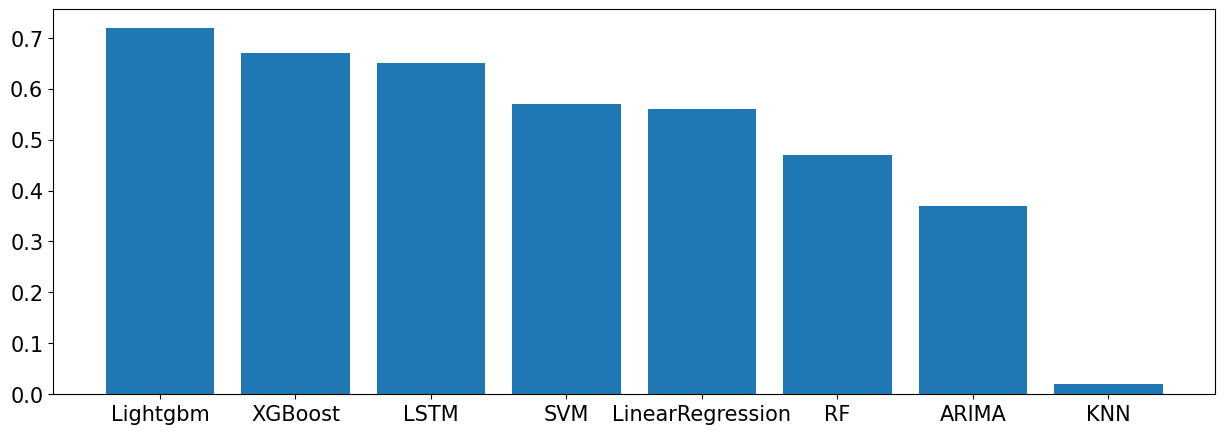

In [58]:
df_r2=df.sort_values(by='r2', ascending=False)

plt.bar(df_r2.index, df_r2.r2)